In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
re=pd.read_csv('bengaluru_house_prices.csv')
re.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
re.shape

(13320, 9)

In [4]:
print(re['area_type'].unique(),"\n")
print(re['availability'].unique(),"\n")
print(re['location'].unique(),"\n")
print(re['size'].unique(),"\n")
print(re['society'].unique(),"\n")
print(re['total_sqft'].unique(),"\n")
print(re['bath'].unique(),"\n")
print(re['balcony'].unique(),"\n")

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area'] 

['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul'] 

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout'] 

['2 BHK'

# Data Cleaning and Filtering

In [5]:
re.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

We will going to drop some columns such as 'society','balcony'(as it contains many missing values), 'area-type' , 'availability' to ensure data accuracy and consistency

In [6]:
re = re.drop(['area_type','balcony','society','availability'],axis=1)
re.shape

(13320, 5)

In [7]:
# Check the null values in the dataset
re.isnull().sum()  

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# Replace Zeros or if any data is missing in 'bath' column we will change it by its mean of that column 
zero_not_accepted=['bath']

for column in zero_not_accepted:
    re[column] = re[column].replace(0,np.NaN) # Change 0-> NaN
    mean=int(re[column].mean(skipna=True)) # Find mean of that col
    re[column]=re[column].replace(np.NaN,mean) # Change the NaN -> mean of that col


In [9]:
re.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [10]:
# Converting the remaining columns missing values to 0
re = re.dropna() 
re.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
re.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
# Only Taking the numeric part of the size col and removing the rest and then store it into bhk and drop the col
re['bhk'] = re['size'].str.split().str[0].astype(int)
re.drop('size',axis=1,inplace=True)

In [13]:
re

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [14]:
#The function first splits the input string by the '-' character and checks if there are two values. If so, it calculates the average of the two values and returns it as a float.
def convertSqft(X):
    var = X.split('-')
    if len(var) == 2:
        return (float(var[0])+float(var[1]))/2
    try:
        return float(X)
    except:
        return None

In [15]:
re2 = re.copy()
re2.total_sqft = re2.total_sqft.apply(convertSqft)
re2 = re2[re2.total_sqft.notnull()]
re2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [16]:
re2.location = re2.location.apply(lambda x: x.strip()) #to remove any leading or trailing whitespace characters from each string in the 'location' column.
stats_of_location = re2['location'].value_counts(ascending=False)
stats_of_location

Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [17]:
location_stats_less_than_12 = stats_of_location[stats_of_location<=12] #  selecting only those locations that appear less than or equal to 12 times in the DataFrame. 
location_stats_less_than_12
# This information can be useful for identifying rare or outlier locations in the dataset that may need to be handled differently in subsequent analysis or modeling.

Sompura                      12
Vishwapriya Layout           12
5th Block Hbr Layout         12
Banashankari Stage V         12
AECS Layout                  12
                             ..
Nagarbhavi  BDA Complex       1
Rajanna Layout                1
1 Ramamurthy Nagar            1
Lakshmipura Vidyaanyapura     1
Abshot Layout                 1
Name: location, Length: 1074, dtype: int64

In [18]:
re2.location = re2.location.apply(lambda x: 'other' if x in location_stats_less_than_12 else x)
len(re2.location.unique())
# This code is replacing the location values that appear less than or equal to 10 times in the 'location' column of a pandas DataFrame 'df2' with a new value 'other'. It then prints the number of unique locations in the 'location' column after the replacement.

214

In [19]:
re2['price_per_sqft'] = re2['price']*100000/re2['total_sqft']
re2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [20]:
# More filtering is being done
# This line of code uses boolean indexing with the loc accessor to select the rows of the DataFrame where the ratio of 'total_sqft' to 'bhk' is greater than or equal to 260.
re3 = re2.loc[re2.total_sqft/re2.bhk > 260]
re3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [21]:
re3.price_per_sqft.describe()

count     12613.000000
mean       6334.816164
std        4187.311672
min         267.829813
25%        4216.867470
50%        5300.077942
75%        6952.595937
max      176470.588235
Name: price_per_sqft, dtype: float64

In [22]:
def graph(re,location):
    bhk2 = re[(re.location==location) & (re.bhk==2)]
    bhk3 = re[(re.location==location) & (re.bhk==3)]
    plt.figure(figsize=(10,6))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='teal',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='red',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

In [23]:
# Shape Before Outlier Removal
re3.shape

(12613, 6)

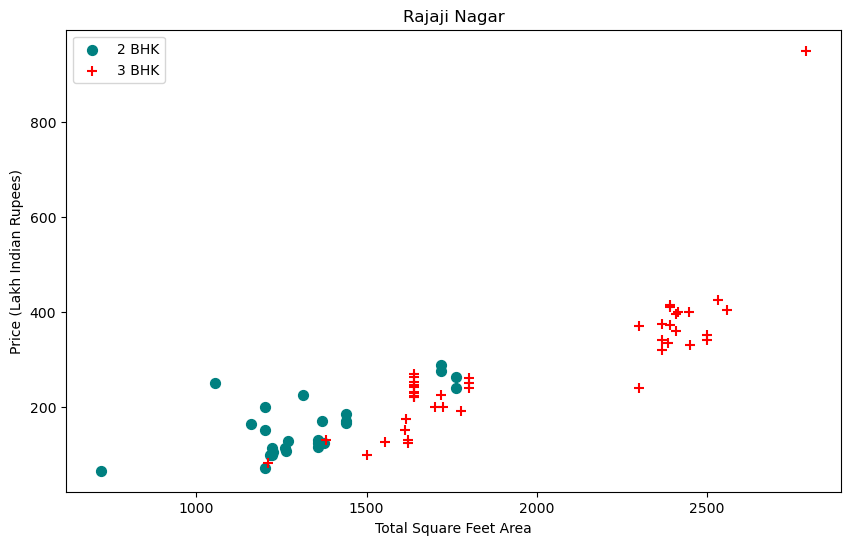

In [24]:
# Before Doing any thing
graph(re3,"Rajaji Nagar")

In [25]:
def outliersRemoval(re):
    re_out = pd.DataFrame()
    for k, sub_re in re.groupby('location'):  #create sub-dataframes for each unique value and apply the outlier removal to each sub-dataframe separately.
        # Calculates mean ,SD of the 'price_per_sqft' column for the current sub-group.
        m = np.mean(sub_re.price_per_sqft) 
        st = np.std(sub_re.price_per_sqft)
        reduced_re = sub_re[(sub_re.price_per_sqft>(m-st)) & (sub_re.price_per_sqft<=(m+st))] #  Select only the data points from the current group that satisfy the condition of being within one standard deviation of the mean value of the 'price_per_sqft' column.
        re_out = pd.concat([re_out,reduced_re],ignore_index=True) # concatenates the outlier-free data points from the current group (i.e., reduced_re) to the previously accumulated outlier-free data points (i.e., re_out), and assigns the result to the variable
    return re_out
re3 = outliersRemoval(re3)

# Shape after outlier removal
re3.shape

(10480, 6)

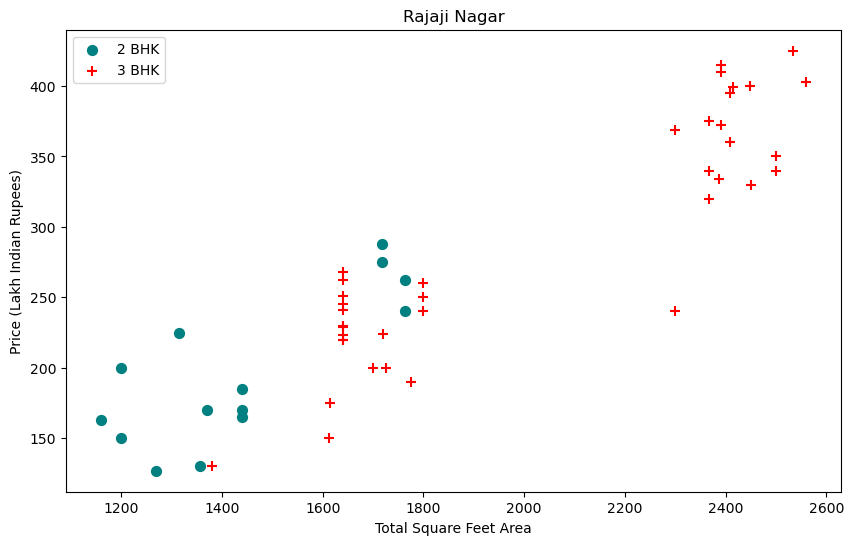

In [26]:
#After removing Outliers 
graph(re3,"Rajaji Nagar")

In [27]:
def outliersRemovalBHK(re):
    exclude_indices = np.array([]) # store the indices of the rows that need to be excluded from the 're'.
    for location, location_re in re.groupby('location'): #creates a new DataFrame location_re for each location group.
        bhk_stats = {}  # store the statistics of each bhk for each location
        for bhk, bhk_re in location_re.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_re.price_per_sqft),
                'std': np.std(bhk_re.price_per_sqft),
                'count': bhk_re.shape[0]
            }
        for bhk, bhk_re in location_re.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_re[bhk_re.price_per_sqft<(stats['mean'])].index.values)
    return re.drop(exclude_indices,axis='index')
re3 = outliersRemovalBHK(re3)

# Shape after outlier removal
re3.shape

(7343, 6)

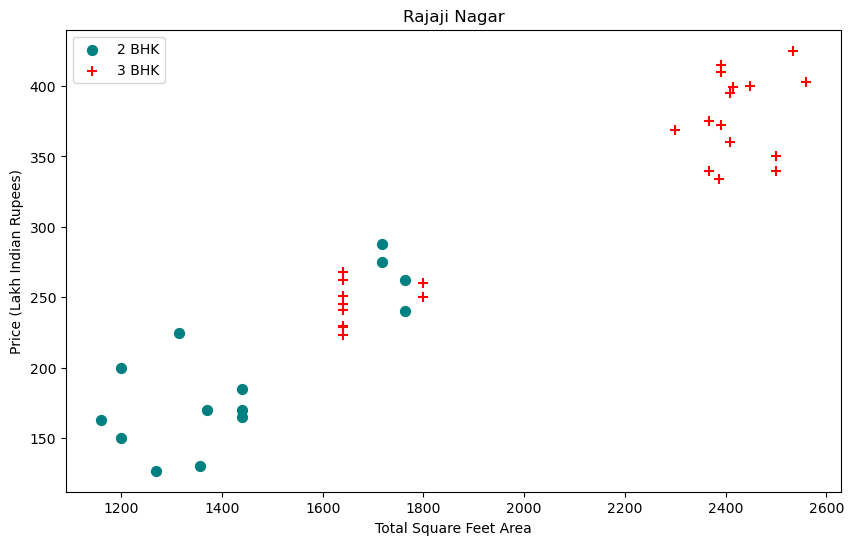

In [28]:
#After removing Outliers 
graph(re3,"Rajaji Nagar")

In [29]:
re3 = re3.drop(['price_per_sqft'],axis=1)

Text(0, 0.5, 'Count')

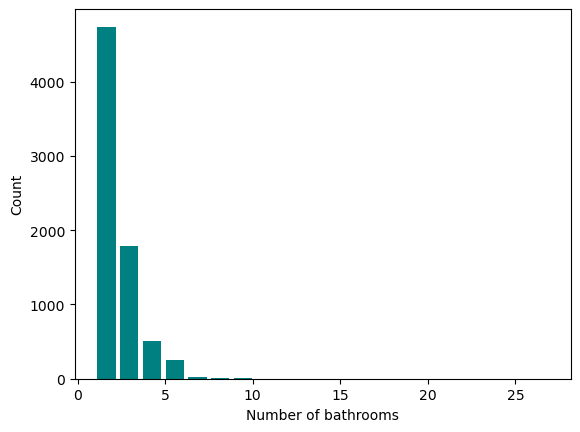

In [30]:
# Histogram to see the bathroom distributon.
plt.hist(re3.bath,rwidth=0.8,color='teal',bins=20)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [31]:
# Used to filter out apartments with excessive number of bathrooms, as it is usually not practical or desirable to have more bathrooms than the number of bedrooms.
re4 = re3.loc[re3.bath < re3.bhk + 3]
re.shape

(13303, 5)

# Data Preprocessing

In [32]:
 #ONE hot encoding
dummies = pd.get_dummies(re4.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,...,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
re4=pd.concat([re4,dummies.drop('other',axis=1)],axis=1)

In [34]:
re4.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
re4 = re4.drop('location',axis=1)

In [36]:
pr = re4.pop('price')
re4.insert(0,'price',pr)
re4.head()

,price,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,428.0,2850.0,4.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,194.0,1630.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,235.0,1875.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,130.0,1200.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,148.0,1235.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X = re4

In [38]:
X

,price,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,428.0,2850.0,4.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,194.0,1630.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,235.0,1875.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,130.0,1200.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,148.0,1235.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10470,200.0,1800.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10474,110.0,1353.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10475,26.0,812.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10477,140.0,1200.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Setting the Independent(X) and Dependent variables(y)
X = re4.iloc[:,1:]
y=re4.iloc[:,0] # This is our answer so we just neeed col 2 
#y=re4['price']


In [40]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Model Building

# Linear Regression

In [41]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
#y_pred

# Calculating the R squared value
r=r2_score(y_test, y_pred)
print("Accuracy:",r*100)

# calculating Mean Squared Error (mse)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Accuracy: 86.88330279151802
Mean squared error: 908.6040058410422


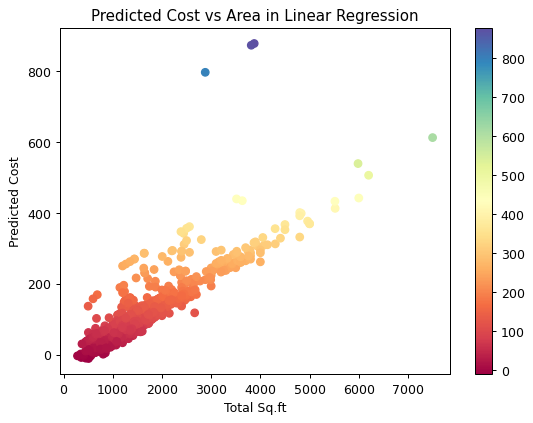

In [55]:
 # Scatter Plot
plt.figure(figsize=(7,5),dpi=90)
plt.scatter(X_test['total_sqft'], y_pred, c=y_pred, cmap='Spectral')
plt.colorbar()
plt.title('Predicted Cost vs Area in Linear Regression')
plt.xlabel('Total Sq.ft')
plt.ylabel('Predicted Cost')
plt.show()

# Ridge Regression

In [43]:

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train, y_train)
y_pred1 = ridgeR.predict(X_test)

# calculating Mean Squared Error (mse)
mse = mean_squared_error(y_test, y_pred1)
print("Mean squared error:", mse)

#Accuracy on train data
X_pred1= ridgeR.predict(X_train)
atd= r2_score(X_pred1, y_train)
print('Accuracy on Train Data', atd*100)

# Calculating the R squared value
r3=r2_score(y_test, y_pred1)
print("Accuracy:",r3*100)

Mean squared error: 884.4092886195796
Accuracy on Train Data 81.6927051199135
Accuracy: 87.23258012003366


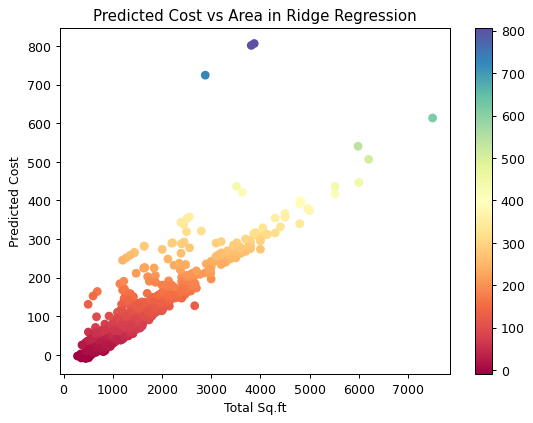

In [44]:
 # Scatter Plot
plt.figure(figsize=(7,5),dpi=90)
plt.scatter(X_test['total_sqft'], y_pred1, c=y_pred1, cmap='Spectral')
plt.colorbar()
plt.title('Predicted Cost vs Area in Ridge Regression')
plt.xlabel('Total Sq.ft')
plt.ylabel('Predicted Cost')
plt.show()

# Lasso Regression

In [45]:
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
y_pred2 = lasso.predict(X_test)

# calculating Mean Squared Error (mse)
mse = mean_squared_error(y_test, y_pred2)
print("Mean squared error:",mse)


# Calculating the R squared value
r4=r2_score(y_test, y_pred2)
print("Accuracy:",r4*100)

Mean squared error: 1938.8275664272287
Accuracy: 72.0108936733732


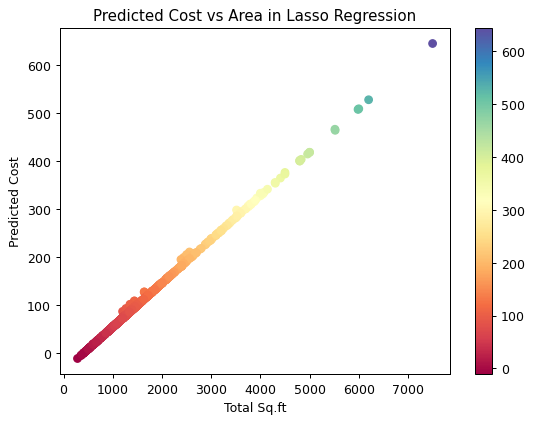

In [46]:
 # Scatter Plot
plt.figure(figsize=(7,5),dpi=90)
plt.scatter(X_test['total_sqft'], y_pred2, c=y_pred2, cmap='Spectral')
plt.colorbar()
plt.title('Predicted Cost vs Area in Lasso Regression')
plt.xlabel('Total Sq.ft')
plt.ylabel('Predicted Cost')
plt.show()

# Decision Tree Regression

In [47]:
DecisionTR = DecisionTreeRegressor()
DecisionTR.fit(X_train,y_train)

# Predicting the Test set results
y_pred3 = DecisionTR.predict(X_test)
#y_pred3

# Calculating the R squared value
b=DecisionTR.score(X_test,y_test) * 100
print ('Accuracy= %.2f'%b, end='%')

Accuracy= 75.46%

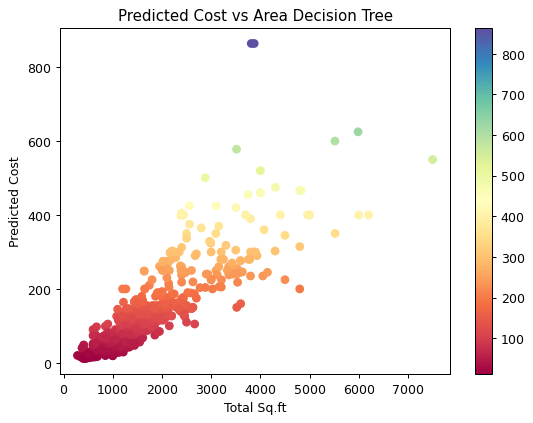

In [48]:
plt.figure(figsize=(7,5),dpi=90)
plt.scatter(X_test['total_sqft'], y_pred3, c=y_pred3, cmap='Spectral')
plt.colorbar()
plt.title('Predicted Cost vs Area Decision Tree')
plt.xlabel('Total Sq.ft')
plt.ylabel('Predicted Cost')
plt.show()

# Random Forest Regression

In [49]:
# Train  Model
rfg = RandomForestRegressor(n_estimators = 200, random_state = 0)
rfg.fit(X_train,y_train)

# Predicting the Test set results
y_pred4 = rfg.predict(X_test)
#y_pred4

sc=rfg.score(X_test,y_test) * 100
print ('Accuracy= %.2f'%sc, end='%')

Accuracy= 83.48%

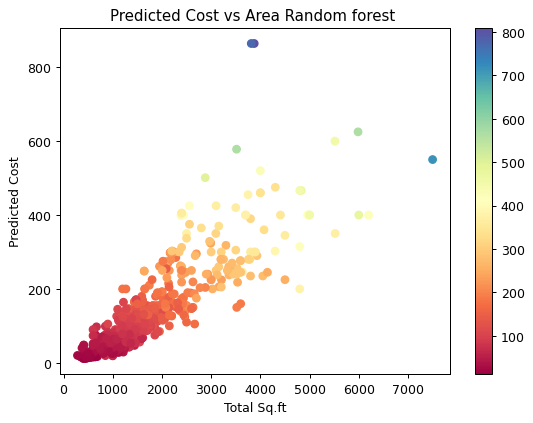

In [50]:
plt.figure(figsize=(7,5),dpi=90)
plt.scatter(X_test['total_sqft'], y_pred3, c=y_pred4, cmap='Spectral')
plt.colorbar()
plt.title('Predicted Cost vs Area Random forest ')
plt.xlabel('Total Sq.ft')
plt.ylabel('Predicted Cost')
plt.show()

# Predicting Price

In [51]:
def pricePrediction(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    a = np.zeros(len(X.columns))
    
    a[0] = sqft
    a[1] = bath
    a[2] = bhk
    if loc_index >= 0:
        a[loc_index] = 1
    return ridgeR.predict([a])[0]

In [52]:
print('₹',round(pricePrediction('1st Phase JP Nagar',1000, 3,2)*100000,0))

₹ 9288367.0


c:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [53]:
print('₹',round(pricePrediction('Kothanur',1000, 5, 3)*100000,0))

₹ 4727462.0


c:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [54]:
print('₹',round(pricePrediction('Indira Nagar',1000, 2, 2)*100000,0))

₹ 17212590.0


c:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
